Задача 4. Из начального приближения x0 = (0, 0) решить задачу нелинейного программирования методом условного градиента, завершая вычисления при ǁx_(k+1) - xkǁ ≤ 0,1. f(x) = x1^2 - 4*x1 + x2^2 - 2*x2 -> min, 0≤x1≤1, 0≤x2≤2.

В результате работы программы выдать количество сделанных итераций, найденное решение и последовательность {xk} на каждой итерации. Сделать визуализацию решения задачи.

 Шаг 0:
   x_1=(0.8,1.6)
 Шаг 1:
   x_2=(0.8923076923076924,0.8615384615384616)
 Шаг 2:
   x_3=(0.9151131221719457,1.1026244343891403)
 Шаг 3:
   x_4=(0.9293593437876055,0.9175754320808253)
 Шаг 4:
   x_5=(0.939256270578811,1.0692257320651377)
 Шаг 5:
   x_6=(0.9465889176056262,0.9401547158478342)
 Шаг 6:
   x_7=(0.9522657333328741,1.0528007456193316)
 Шаг 7:
   x_8=(0.9568042721928416,0.9527012274028551)
 Шаг 8:
   x_9=(0.9605234017270274,1.0428731030492497)

По критерию остановки: ||x_k+1 - x_k|| <= 0.1 -> 0.09024854060914729. 
Решение: x_9 = (0.9605234017270274,1.0428731030492497)


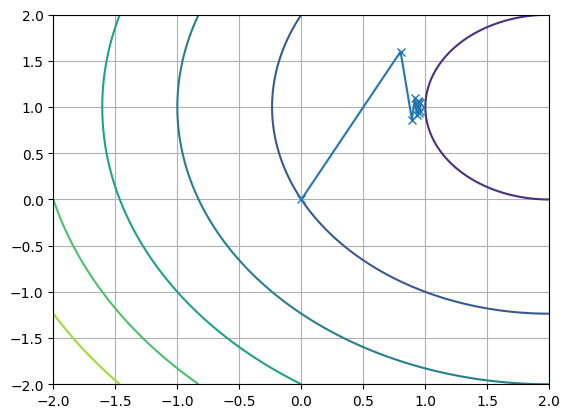

In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import linprog
from matplotlib import pyplot as plt

x1_ineq = (0, 1)
x2_ineq = (0, 2)
x1, x2 = sp.symbols("x1 x2")
f = x1**2 - 4*x1 + x2**2 - 2*x2
A = np.array([[f.coeff(x1**2), f.coeff(x1*x2)], [f.coeff(x1*x2), f.coeff(x2**2)]])
b = np.array([f.coeff(x1), f.coeff(x2)])
f_sym = sp.lambdify((x1, x2), f, "numpy")
df_sym = sp.lambdify((x1, x2), sp.derive_by_array(f, [x1, x2]), "numpy")
x = np.array([[0, 0]])

for k in range(100):
    scalar_f = np.dot(df_sym(*x[k]), [x1-x[k][0], x2-x[k][1]])
    x_min = linprog(c=[scalar_f.coeff(x1), scalar_f.coeff(x2)], bounds=[x1_ineq, x2_ineq]).x
    d = x_min - x[k]
    alpha = -(np.dot(2*A.dot(x[k]) + b, d) / (2*A.dot(d).dot(d)))
    x = np.append(x, [np.double(x[k] + alpha*d)], axis=0)
    
    print(f" Шаг {k}:\n   x_{k+1}=({x[k+1][0]},{x[k+1][1]})")
    if np.linalg.norm(x[k+1] - x[k]) <= 0.1:
        print(f"\nПо критерию остановки: ||x_k+1 - x_k|| <= 0.1 -> {np.linalg.norm(x[k+1] - x[k])} <= 0.1. \nРешение: x_{k+1} = ({x[k+1][0]},{x[k+1][1]})")
        break

if k==99:
    print(f"Остановка по количеству итераций: 100 \n Последнее решение: x_{k+1} = ({x[k+1][0]},{x[k+1][1]})")

# Рисуем
space = np.linspace(-2, 2, 1000)
x1, x2 = np.meshgrid(space, space)

plt.contour(x1, x2, f_sym(x1, x2))
plt.plot(x.T[0], x.T[1], marker='x')
plt.grid()